<a href="https://colab.research.google.com/github/TonyQ2k3/pytorch-training/blob/main/notebooks/pytorch_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Day 5 - Building a non-linear model
---

## Non-linear model

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [12]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(X.shape)
print(y.shape)

torch.Size([1000, 2])
torch.Size([1000])


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 10)
    self.layer2 = nn.Linear(10, 10)
    self.layer3 = nn.Linear(10, 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [32]:
model = CircleModelV2()
model

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [35]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
epochs = 1000
train_losses = []
test_losses = []

In [36]:
torch.manual_seed(42)

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  loss = loss_fn(y_logits, y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_loss = loss_fn(test_logits, y_test)
    test_losses.append(test_loss.item())

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")

Epoch: 0 | Train loss: 0.5682 | Test loss: 0.5738
Epoch: 100 | Train loss: 0.4815 | Test loss: 0.4993
Epoch: 200 | Train loss: 0.3706 | Test loss: 0.4059
Epoch: 300 | Train loss: 0.2546 | Test loss: 0.3033
Epoch: 400 | Train loss: 0.1718 | Test loss: 0.2211
Epoch: 500 | Train loss: 0.1219 | Test loss: 0.1651
Epoch: 600 | Train loss: 0.0912 | Test loss: 0.1274
Epoch: 700 | Train loss: 0.0710 | Test loss: 0.1032
Epoch: 800 | Train loss: 0.0577 | Test loss: 0.0867
Epoch: 900 | Train loss: 0.0485 | Test loss: 0.0747


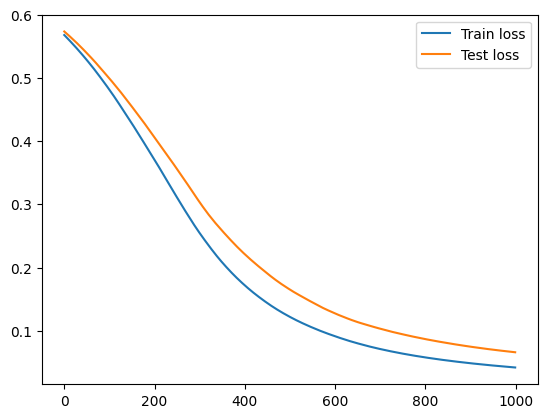

In [37]:
eps = [x for x in range(epochs)]
plt.plot(eps, train_losses, label="Train loss")
plt.plot(eps, test_losses, label="Test loss")
plt.legend()
plt.show()

In [22]:
# Download helper function
import requests
from pathlib import Path

if Path("helper_functions.py").is_file() is not True:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

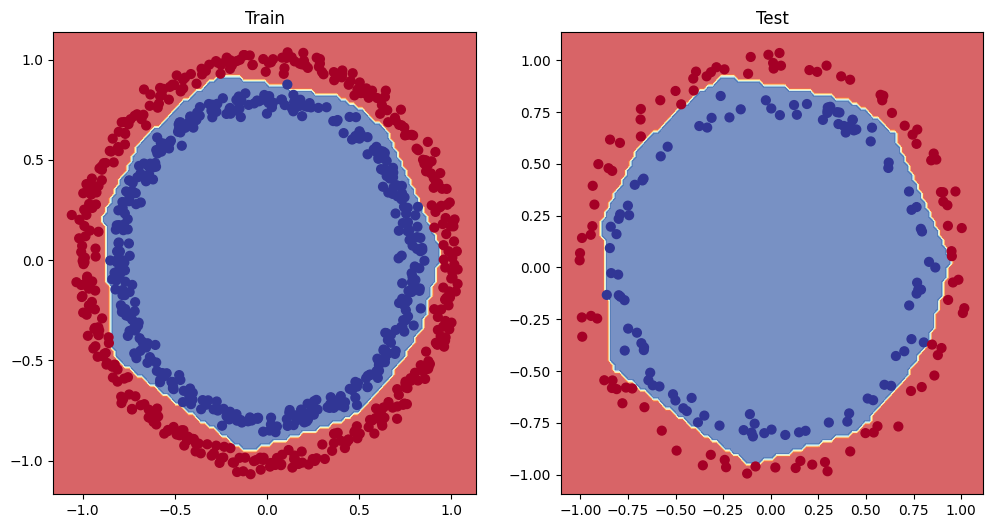

In [38]:
# Visualize result
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)